# Estudos focado em Pandas

In [11]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.__version__

'1.0.4'

## Importa cvs de filmes da Netflis
### from https://www.kaggle.com/shivamb/netflix-shows?select=netflix_titles.csv
* importante notar que country tem vários paises concatenados na string, separados por vírgula

In [12]:
df = pd.read_csv('.\\netflix_titles.csv')
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


## A Contagem simples por tipo de filme funciona normalmente
Lembrar que: 
* Deve-se especificar uma coluna, senão ele vai fazer a conta para o DF inteiro
* A função <code>.value_counts()</code> verica valores distintos
* A função <code>.count()</code> conta os valores, ignorando os NaN
* A propriedade <code>.size</code> verifica o tamanho total, incluindo os NaN

In [33]:
# Contagem de títulos por tipo
df['type'].value_counts()

Movie      4265
TV Show    1969
Name: type, dtype: int64

In [40]:
df['type'].size

6234

# Verificar quantos filmes estão disponíveis por país
## Fazendo a contagem simples, pode-se ver que 

In [42]:
# normalize=True -> Coloca em %
#  ascending=False -> do maior para o menor
#df['country'].value_counts(normalize=True, ascending=False)
df['country'].value_counts()

United States                                         0.352900
India                                                 0.134943
United Kingdom                                        0.060438
Japan                                                 0.030566
Canada                                                0.024488
                                                        ...   
Taiwan, Hong Kong, United States, China               0.000174
United Kingdom, Italy, Israel, Peru, United States    0.000174
Somalia, Kenya, Sudan, South Africa, United States    0.000174
United States, Colombia                               0.000174
United Kingdom, India, Sweden                         0.000174
Name: country, Length: 554, dtype: float64

In [43]:
# Se transformar os valores com split, conseguimos separar os países
df['country'].str.split(',')

0       [United States,  India,  South Korea,  China]
1                                    [United Kingdom]
2                                     [United States]
3                                     [United States]
4                                     [United States]
                            ...                      
6229                                  [United States]
6230                                  [United States]
6231                                              NaN
6232                                 [United Kingdom]
6233                                  [United States]
Name: country, Length: 6234, dtype: object

In [46]:
# Uma forma para contar filmes por país é separar os filmes em uma série
paises = pd.Series()

# É necessário ignorar os NaN, porque NaN derro no split
for paisStr in df.loc[df['country'].notna(),'country']:
    #if type(paisStr) == type('a a a'):
    #    a = 1#print(type(paisStr))
    #else:
    #    print(f'Tipo: {type(paisStr)}, país: {paisStr}')
    paises = paises.append(pd.Series(paisStr.split(',')))

# Faço um .strip() para tirar os espaços em branco (é o trim())
paises = paises.apply(lambda x: x.strip())
paises.head(5)

0     United States
1             India
2       South Korea
3             China
0    United Kingdom
dtype: object

In [31]:
# Agora tenho os valores distintos
paises.value_counts()

United States     2610
India              838
United Kingdom     602
Canada             318
France             271
                  ... 
East Germany         1
Ecuador              1
Slovakia             1
Armenia              1
Uganda               1
Length: 111, dtype: int64

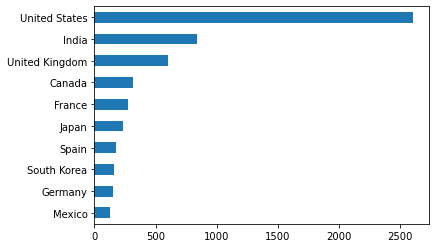

In [51]:
# Gráfico de barras do 10 primeiros países com mais filmes
# .invert_yaxis() --> deixa do maior para o menor
paises.value_counts().head(10).plot(kind='barh').invert_yaxis()

In [70]:
# Contade de países sem país cadastrado
msg = f'''Com país cadastrado: {df['country'].count()}
Sem país cadastrado: {df.loc[df['country'].isna(),'country'].size}
Total de filmes    : {df['country'].size}'''
print(msg)

Com país cadastrado: 5758
Sem país cadastrado: 476
Total de filmes    : 6234
